# Ejercicios - Clase 9

Ejercicios de los bloques de introducción a python. Pandas 2

**Versión**: 1.0

**Fecha**: 28/10/2023

En este notebook vamos a trabajar con un dataset de consumo eléctrico. Lo primero, cargaremos el fichero de datos del CSV correspondiente y analizaremos el dataset.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/5_series_temporales/data/Power_consumption.csv")
df.drop(['Time', 'Solar'], axis=1, inplace=True) # Borramos las columnas que no vamos a necesitar para los ejercicios
df

,Date,Consumption,Wind
0,2006-01-01,1069.18400,NaN
1,2006-01-02,1380.52100,NaN
2,2006-01-03,1442.53300,NaN
3,2006-01-04,1457.21700,NaN
4,2006-01-05,1477.13100,NaN
...,...,...,...
4378,2017-12-27,1263.94091,394.507
4379,2017-12-28,1299.86398,506.424
4380,2017-12-29,1295.08753,584.277
4381,2017-12-30,1215.44897,721.247


Vamos a hacer un preprocesado adicional para indicar los tipos de las columnas.

In [24]:
# Como podemos ver, Date no es de tipo Datetime, sino object. Hay que cambiarlo antes de empezar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
dtypes: float64(2), object(1)
memory usage: 102.9+ KB


In [25]:
# Con esta celda estamos indicando que la columna fecha tenga formato datetime
df.Date = pd.to_datetime(df.Date)

In [26]:
# Ahora sí, fecha tiene dtype datetime64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 102.9 KB


In [27]:
# Si volvemos a ver el dataframe, vemos que en aspecto no ha cambiado nada.
df

,Date,Consumption,Wind
0,2006-01-01,1069.18400,NaN
1,2006-01-02,1380.52100,NaN
2,2006-01-03,1442.53300,NaN
3,2006-01-04,1457.21700,NaN
4,2006-01-05,1477.13100,NaN
...,...,...,...
4378,2017-12-27,1263.94091,394.507
4379,2017-12-28,1299.86398,506.424
4380,2017-12-29,1295.08753,584.277
4381,2017-12-30,1215.44897,721.247


In [28]:
# ¿Y si ahora separo la fecha en tres columnas: year, month y day para simplificar las cosas?
df['year'] = df.Date.dt.year.astype(int)
df['month'] = df.Date.dt.month.astype(int)
df['day'] = df.Date.dt.day.astype(int)

In [29]:
# Veamos el aspecto del dataframe
df

,Date,Consumption,Wind,year,month,day
0,2006-01-01,1069.18400,NaN,2006,1,1
1,2006-01-02,1380.52100,NaN,2006,1,2
2,2006-01-03,1442.53300,NaN,2006,1,3
3,2006-01-04,1457.21700,NaN,2006,1,4
4,2006-01-05,1477.13100,NaN,2006,1,5
...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,2017,12,27
4379,2017-12-28,1299.86398,506.424,2017,12,28
4380,2017-12-29,1295.08753,584.277,2017,12,29
4381,2017-12-30,1215.44897,721.247,2017,12,30


In [30]:
# Por último, vamos a indexar por la fecha para trabajar con datos temporales
df = df.set_index("Date")
df

,Consumption,Wind,year,month,day
Date,,,,,
2006-01-01,1069.18400,NaN,2006,1,1
2006-01-02,1380.52100,NaN,2006,1,2
2006-01-03,1442.53300,NaN,2006,1,3
2006-01-04,1457.21700,NaN,2006,1,4
2006-01-05,1477.13100,NaN,2006,1,5
...,...,...,...,...,...
2017-12-27,1263.94091,394.507,2017,12,27
2017-12-28,1299.86398,506.424,2017,12,28
2017-12-29,1295.08753,584.277,2017,12,29


## Ejercicio 1

Siempre que podamos, intentemos visualizar cómo son los datos con los que estamos trabajando. Genera una figura donde el eje X sea la fecha y el eje Y sea el valor de las variables `Consumption` y `Wind`.

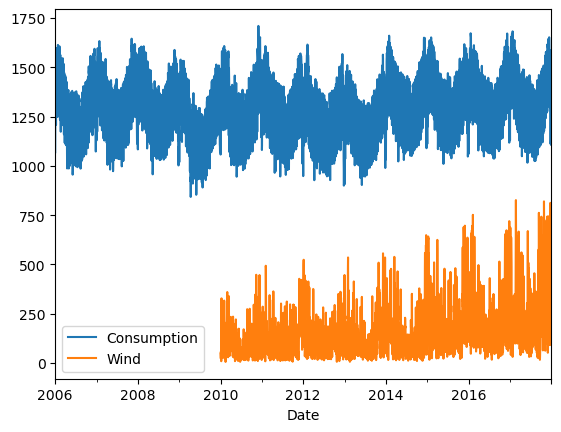

In [34]:
# TO-DO Genera la figura utilizando PLOT
df[['Consumption', 'Wind']].plot()
plt.show()

La figura da mucha información, pero tendría más sentido evaluar el consumo y lo que aporta la energía eólica en rango mensual. Genera de nuevo la figura pero agrupando por meses. No es válido utilizar la función `resample()`.

In [46]:
# TO-DO Calcula el consumo por mes sin utilizar resample
df_mensual = df.drop('day', axis=1).groupby(['year', 'month']).sum()
df_mensual

Consumption       Wind
year month                        
2006 1      45304.70400      0.000
     2      41078.99300      0.000
     3      43978.12400      0.000
     4      38251.76700      0.000
     5      38858.14300      0.000
...                 ...        ...
2017 8      40029.77368   5499.798
     9      40078.56092   6287.730
     10     42355.21893  12480.097
     11     44339.72455  10259.001
     12     44511.10431  14725.436

[144 rows x 2 columns]

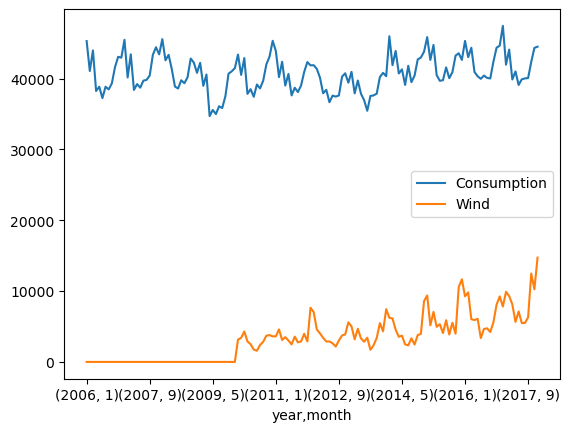

In [48]:
# TO-DO Ahora sí, dibuja el consumo por mes
df_mensual.plot()
plt.show()

## Ejercicio 2

Calcula el valor real de consumo, considerando que la energía generada por el viento es utilizada al 100%. Luego dibuja las tres series en el mismo gráfico.

In [51]:
# TO-DO Crea una nueva columna en el dataframe que guarde el consumo real
df_mensual['Real_Consumption'] = df_mensual.Consumption - df_mensual.Wind
df_mensual

Consumption       Wind  Real_Consumption
year month                                          
2006 1      45304.70400      0.000       45304.70400
     2      41078.99300      0.000       41078.99300
     3      43978.12400      0.000       43978.12400
     4      38251.76700      0.000       38251.76700
     5      38858.14300      0.000       38858.14300
...                 ...        ...               ...
2017 8      40029.77368   5499.798       34529.97568
     9      40078.56092   6287.730       33790.83092
     10     42355.21893  12480.097       29875.12193
     11     44339.72455  10259.001       34080.72355
     12     44511.10431  14725.436       29785.66831

[144 rows x 3 columns]

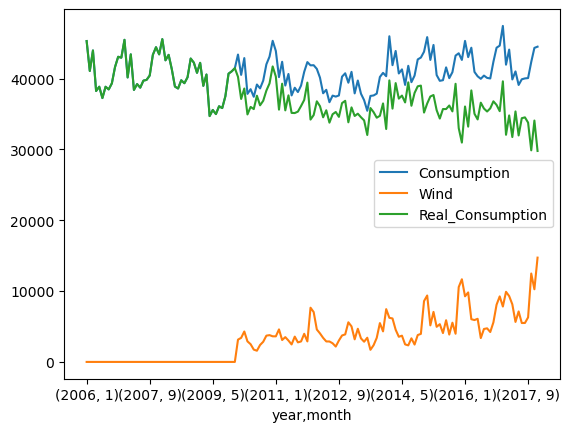

In [53]:
# TO-DO Dibuja el consumo real por mes
df_mensual.plot()
plt.show()

## Ejercicio 3

Parece razonable pensar que debería haber cierta estacionalidad en la cantidad de energía generada `Wind`. Vamos a intentar encontrar esa estacionalidad a partir de los datos.

Antes de nada, eliminemos del dataframe los datos donde no tenemos generación de energía eólica.

In [105]:
# TO-DO No consideres las filas donde no haya generación de energía
df_wind = df_mensual[df_mensual.Wind > 0.0]
df_wind

Consumption       Wind  Real_Consumption
year month                                          
2010 1      43401.29200   3148.914       40252.37800
     2      40525.03100   3398.549       37126.48200
     3      42899.82200   4295.821       38604.00100
     4      37845.16400   2902.002       34943.16200
     5      38508.82400   2502.340       36006.48400
...                 ...        ...               ...
2017 8      40029.77368   5499.798       34529.97568
     9      40078.56092   6287.730       33790.83092
     10     42355.21893  12480.097       29875.12193
     11     44339.72455  10259.001       34080.72355
     12     44511.10431  14725.436       29785.66831

[96 rows x 3 columns]

Ahora sí, dibuja en una gráfica la generación de energía eólica por año.

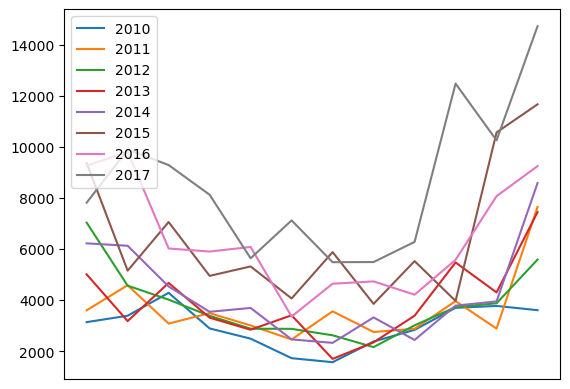

In [123]:
# TO-DO Dibuja en una gráfica la generación de energía eólica por año
df_wind['Wind'].groupby('year').plot()
plt.xticks([])
plt.xlabel("")
plt.legend(loc='upper left')
plt.show()

In [107]:
# TO-DO Calcula la cantidad promedio generada en cada mes
wind_mensual = df_wind.Wind.groupby('month').mean()
wind_mensual

month
1     6439.210875
2     5846.137000
3     5379.005000
4     4459.341750
5     4004.009625
6     3444.361750
7     3483.669625
8     3389.874125
9     3831.933750
10    5341.739500
11    5968.023500
12    8569.866500
Name: Wind, dtype: float64

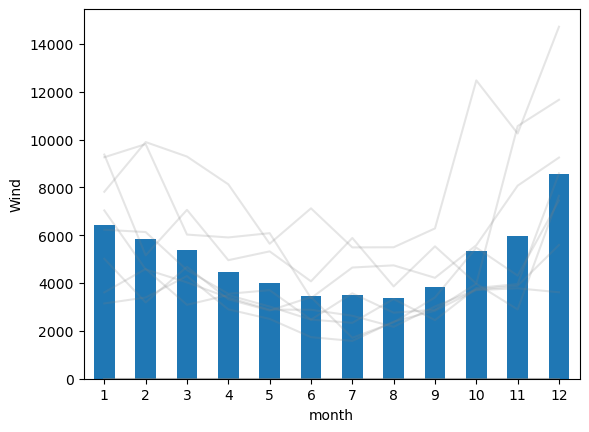

In [121]:
# # TO-DO Dibuja en una gráfica la cantidad promedio generada en cada mes
# Añade también de fondo las curvas de cada año
wind_mensual.plot.bar()
df_mensual['Wind'].groupby('year').plot(c="gray", alpha=0.2)
plt.xticks(list(range(12)), [str(i) for i in range(1, 13)])
plt.xlabel("month")
plt.ylabel("Wind")
plt.show()